## Work

請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等




請同學將前三日的 Regularization 方式加以組合，並觀察對訓練造成的影響

- ## <font color="red">Regularizers : 隱藏層內的 L1 / L2 正規化</font>

- ## <font color="red">Dropout : 隨機省略神經元輸出的正規化</font>

- ## <font color="red">Batch-normalization : 傳遞時神經元橫向平衡的正規化</font>

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
Regularizers : 隱藏層內的 L1 / L2 正規化
Dropout : 隨機省略神經元輸出的正規化
Batch-normalization : 傳遞時神經元橫向平衡的正規化
"""

from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4, drp_ratio=0.2):
    
    # input layer
    input_layer = keras.layers.Input(input_shape)
    
    # hidden layer
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer) # regularization
            
            x = Dropout(drp_ratio)(x) # Dropput
            x = BatchNormalization()(x) # BatchNormalization
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x) # regularization
            x = Dropout(drp_ratio)(x) # Dropput
            x = BatchNormalization()(x) # BatchNormalization
    
    # output layer
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0, 0.25, 0.5]
L2_EXP = [0, 1e-2, 1e-4]

W0723 23:45:26.711117 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 23:45:26.749237 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 23:45:26.761111 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 23:45:26.897324 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.p

Experiment with Regulizer = 0.000000, and Dropout = 0.000000


W0723 23:45:27.171107 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 23:45:27.182395 4564010432 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

W0723 23:45:27.386374 4564010432 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8806 - acc: 0.3573 - val_loss: 1.7255 - val_acc: 0.3965
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.5529 - acc: 0.4555 - val_loss: 1.6548 - val_acc: 0.4109
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4517 - acc: 0.4914 - val_loss: 1.6829 - val_acc: 0.4101
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3817 - acc: 0.5139 - val_loss: 1.5129 - val_acc: 0.4678
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3178 - acc: 0.5387 - val_loss: 1.5151 - val_acc: 0.4695
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.2658 - acc: 0.5562 - val_loss: 1.5070 - val_acc: 0.4677
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.2159 - acc: 0.5752 - val_loss: 1.4740 - 

W0723 23:51:17.617793 4564010432 deprecation.py:506] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Experiment with Regulizer = 0.000000, and Dropout = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normaliza

50000/50000 [==============================] - 7s 147us/step - loss: 1.6362 - acc: 0.4099 - val_loss: 1.5209 - val_acc: 0.4521
Epoch 42/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6343 - acc: 0.4109 - val_loss: 1.5370 - val_acc: 0.4430
Epoch 43/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6306 - acc: 0.4074 - val_loss: 1.5089 - val_acc: 0.4636
Epoch 44/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6216 - acc: 0.4147 - val_loss: 1.5078 - val_acc: 0.4521
Epoch 45/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6205 - acc: 0.4143 - val_loss: 1.5337 - val_acc: 0.4420
Epoch 46/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6154 - acc: 0.4196 - val_loss: 1.4990 - val_acc: 0.4634
Epoch 47/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6111 - acc: 0.4155 - val_loss: 1.4959 - val_acc: 0.4682
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 7s 148us/step - loss: 1.7760 - acc: 0.4356 - val_loss: 1.7677 - val_acc: 0.4314
Epoch 32/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7436 - acc: 0.4462 - val_loss: 1.6995 - val_acc: 0.4548
Epoch 33/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7428 - acc: 0.4399 - val_loss: 1.6683 - val_acc: 0.4692
Epoch 34/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7268 - acc: 0.4435 - val_loss: 1.6756 - val_acc: 0.4532
Epoch 35/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7096 - acc: 0.4440 - val_loss: 1.6583 - val_acc: 0.4583
Epoch 36/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7094 - acc: 0.4428 - val_loss: 1.6553 - val_acc: 0.4569
Epoch 37/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6922 - acc: 0.4450 - val_loss: 1.6838 - val_acc: 0.4497
Epoch 38/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 0.8657 - acc: 0.7519 - val_loss: 1.8206 - val_acc: 0.4599
Epoch 22/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.8439 - acc: 0.7608 - val_loss: 1.8932 - val_acc: 0.4494
Epoch 23/50
50000/50000 [==============================] - 6s 129us/step - loss: 0.8175 - acc: 0.7709 - val_loss: 1.9318 - val_acc: 0.4536
Epoch 24/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7888 - acc: 0.7796 - val_loss: 1.8248 - val_acc: 0.4873
Epoch 25/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.7571 - acc: 0.7932 - val_loss: 1.8802 - val_acc: 0.4817
Epoch 26/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.7301 - acc: 0.8019 - val_loss: 1.9184 - val_acc: 0.4661
Epoch 27/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7029 - acc: 0.8122 - val_loss: 1.9794 - val_acc: 0.4692
Epoch 28/50
50000/50000 [==============

50000/50000 [==============================] - 7s 142us/step - loss: 1.9443 - acc: 0.3400 - val_loss: 1.8388 - val_acc: 0.3871
Epoch 12/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.9292 - acc: 0.3496 - val_loss: 1.8131 - val_acc: 0.3955
Epoch 13/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.9173 - acc: 0.3546 - val_loss: 1.8040 - val_acc: 0.3933
Epoch 14/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9059 - acc: 0.3572 - val_loss: 1.7935 - val_acc: 0.4031
Epoch 15/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.8965 - acc: 0.3630 - val_loss: 1.7774 - val_acc: 0.4052
Epoch 16/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8927 - acc: 0.3652 - val_loss: 1.7789 - val_acc: 0.4029
Epoch 17/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.8906 - acc: 0.3627 - val_loss: 1.7747 - val_acc: 0.4048
Epoch 18/50
50000/50000 [==============

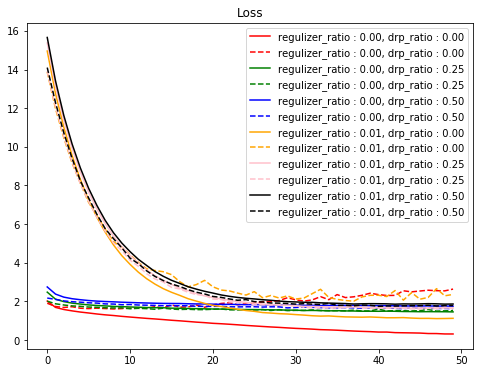

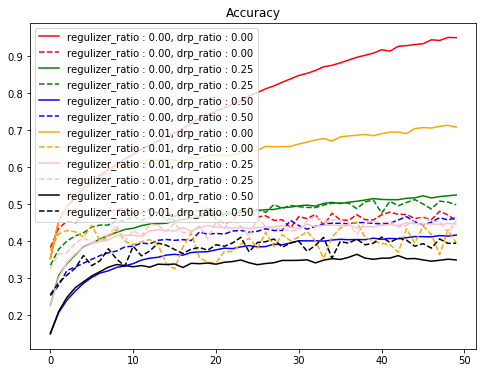

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define results
results = {}
for regulizer_ratio in L2_EXP :
    for dropout in Dropout_EXP :
#         keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.6f, and Dropout = %.6f" % (regulizer_ratio, dropout))
    
        model = build_mlp(input_shape=x_train.shape[1:], l2_ratio = regulizer_ratio, drp_ratio = dropout)
        model.summary()

#       optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        name_tag = 'regulizer_ratio : %.2f, drp_ratio : %.2f' % (regulizer_ratio, dropout)
        results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc' : train_acc,
                             'valid-acc' : valid_acc}
        
# plot
# 因為 len(results.keys()) == 9 ，所以 color_bar 要 9 colors --> color hex
color_bar = ["r", "g", "b", "orange", "pink", 
             "k", "#271e17", "#44929b", "#f2a343"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()


## 看過 ANS 後改一版

W0725 09:28:20.227435 4556629440 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0725 09:28:20.228356 4556629440 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0725 09:28:20.252113 4556629440 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 09:28:20.252922 4556629440 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/back

Numbers of exp: 0, with bn: True, drp_ratio: 0.00, l2_ratio: 0.00


W0725 09:28:20.575778 4556629440 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 09:28:20.661989 4556629440 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

W0725 09:29:21.939571 4556629440 deprecation.py:506] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Numbers of exp: 3, with bn: True, drp_ratio: 0.25, l2_ratio: 0.00
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_norm

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 9s 173us/step - loss: 2.6386 - acc: 0.1443 - val_loss: 2.0870 - val_acc: 0.2368
Epoch 2/2
50000/50000 [==============================] - 8s 154us/step - loss: 2.2401 - acc: 0.2061 - val_loss: 1.9714 - val_acc: 0.2731
Numbers of exp: 7, with bn: True, drp_ratio: 0.50, l2_ratio: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
________________

W0725 09:31:30.476882 4556629440 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Numbers of exp: 9, with bn: True, drp_ratio: 0.80, l2_ratio: 0.00


W0725 09:31:30.652123 4556629440 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0725 09:31:30.742665 4556629440 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
__________

W0725 09:31:45.190787 4556629440 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0725 09:31:45.278434 4556629440 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Numbers of exp: 10, with bn: True, drp_ratio: 0.80, l2_ratio: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_nor

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 6s 115us/step - loss: 2.1535 - acc: 0.2766 - val_loss: 1.9907 - val_acc: 0.3486
Epoch 2/2
50000/50000 [==============================] - 5s 100us/step - loss: 1.9338 - acc: 0.3711 - val_loss: 1.8841 - val_acc: 0.3903
Numbers of exp: 15, with bn: False, drp_ratio: 0.25, l2_ratio: 0.00
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 7s 147us/step - loss: 15.3302 - acc: 0.1326 - val_loss: 14.2264 - val_acc: 0.2523
Epoch 2/2
50000/50000 [==============================] - 6s 121us/step - loss: 13.3282 - acc: 0.1789 - val_loss: 12.3630 - val_acc: 0.2670
Numbers of exp: 20, with bn: False, drp_ratio: 0.50, l2_ratio: 0.00
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________

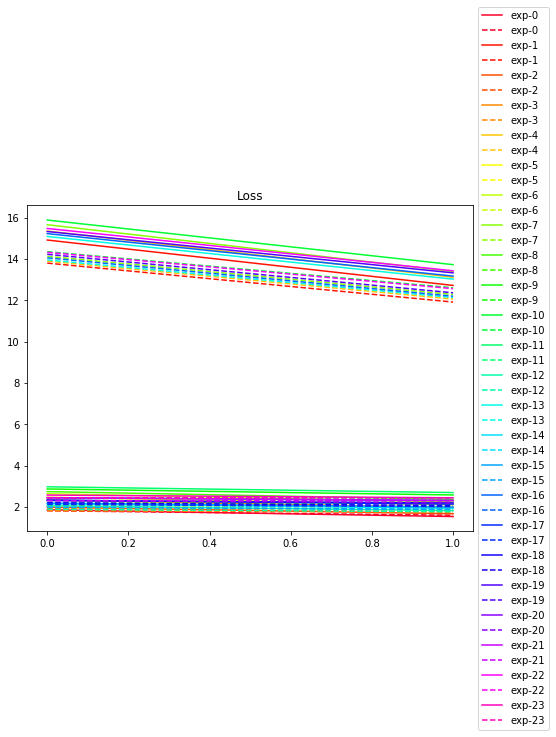

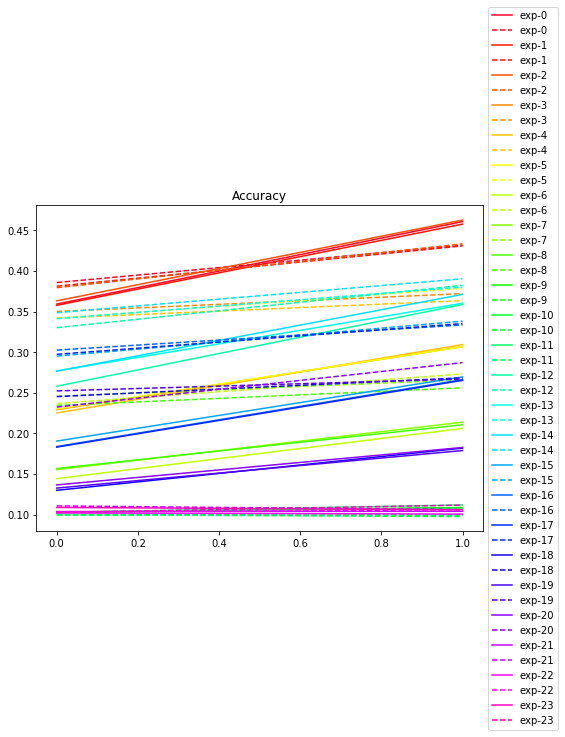

In [3]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""


train, test = keras.datasets.cifar10.load_data()


## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    



x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)




"""
Regularizers : 隱藏層內的 L1 / L2 正規化
Dropout : 隨機省略神經元輸出的正規化
Batch-normalization : 傳遞時神經元橫向平衡的正規化
"""
# from keras.layers import BatchNormalization, Activation, Dropout, regularizers
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Dropout
from keras.layers import BatchNormalization


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], use_bn=True, drp_ratio=0, l2_ratio=0):
    
    # input layer
    input_layer = keras.layers.Input(input_shape)
    
    # hidden layer
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer) # regularization
            
            x = Dropout(drp_ratio)(x) # Dropput
            if use_bn:
                x = BatchNormalization()(x) # BatchNormalization
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x) # regularization
            x = Dropout(drp_ratio)(x) # Dropput
            if use_bn:
                x = BatchNormalization()(x) # BatchNormalization
    
    # output layer
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 2 # 50
BATCH_SIZE = 256

MOMENTUM = 0.95

"""
建立實驗組合
"""
USE_BN = [True, False]
DRP_RATIO = [0, 0.25, 0.5, 0.8]
L2_RATIO = [0, 1e-2, 1e-4]






# Collect results
import keras.backend as K

"""
以迴圈方式遍歷組合來訓練模型
"""
results = {}
for i, (use_bn, drp_ratio, l2_ratio) in enumerate(itertools.product(USE_BN, DRP_RATIO, L2_RATIO)):
    
    # clear_session
    K.clear_session()
    
    # build model
    print("Numbers of exp: %i, with bn: %s, drp_ratio: %.2f, l2_ratio: %.2f" % (i, use_bn, drp_ratio, l2_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], use_bn=use_bn, drp_ratio=drp_ratio, l2_ratio=l2_ratio)
    model.summary()
    
    # compile
#   optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              verbose=1,
              shuffle=True)
    
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}



# Plot results
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline

# 顏色數 要和前面的 嘗試參數組合數 一樣
NUM_COLORS = 24
cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

# plot
# loss
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# acc
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()